In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("driver-data.csv", index_col="id")
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [3]:
from sklearn.cluster import KMeans

In [4]:
kmeans = KMeans(n_clusters=4)

In [5]:
kmeans.fit(data)

KMeans(n_clusters=4)

In [6]:
kmeans.cluster_centers_

array([[ 49.9799964 ,   5.22434282],
       [180.34311782,  10.52011494],
       [ 50.49167849,  32.49172577],
       [177.83509615,  70.28846154]])

In [7]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [8]:
import numpy as np

In [9]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [10]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 2775, 1: 696, 2: 425, 3: 104}

In [11]:
import seaborn as sns

In [12]:
data["cluster"] = kmeans.labels_

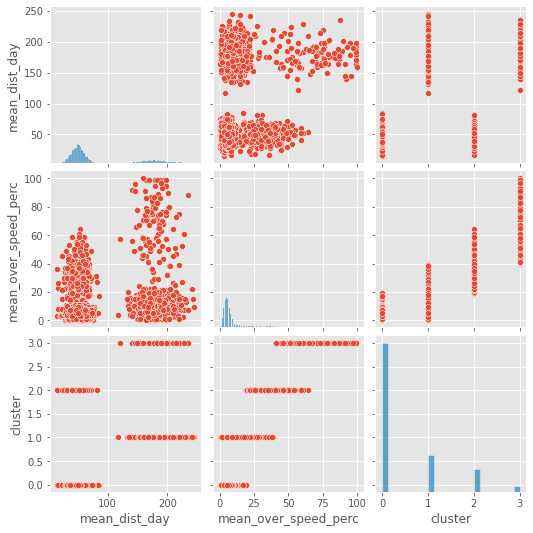

In [32]:
sns.pairplot(data)

In [14]:
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

719603.9690822498

In [15]:
kmeans.score

<bound method KMeans.score of KMeans(n_clusters=4)>

In [107]:
data

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423311935,71.24,28,3
3423313212,52.53,25,3
3423313724,64.54,27,3
3423311373,55.69,22,3
3423310999,54.58,25,3
3423313857,41.91,10,0
3423312432,58.64,20,3
3423311434,52.02,8,0
3423311328,31.25,34,3


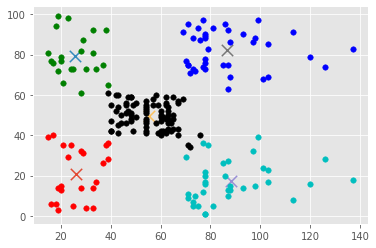

AttributeError: 'K_Means' object has no attribute 'labels_'

In [30]:
#================================================================================================================
#----------------------------------------------------------------------------------------------------------------
#									K MEANS CLUSTERING
#----------------------------------------------------------------------------------------------------------------
#================================================================================================================

# K means clustering is applied to normalized ipl player data

from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd 

style.use('ggplot')

class K_Means:
	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

	def fit(self, data):

		self.centroids = {}

		#initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
		for i in range(self.k):
			self.centroids[i] = data[i]

		#begin iterations
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOptimal:
				break

	def pred(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification

def main():
	
	df = pd.read_csv("Mall_Customers.csv")
	df = X = df.iloc[:, [3, 4]]
	dataset = df.astype(float).values.tolist()

	X = df.values #returns a numpy array
	
	km = K_Means(5)
	km.fit(X)

	# Plotting starts here
	colors = 10*["r", "g", "c", "b", "k"]

	for centroid in km.centroids:
		plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

	for classification in km.classes:
		color = colors[classification]
		for features in km.classes[classification]:
			plt.scatter(features[0], features[1], color = color,s = 30)
	
	plt.show()


if __name__ == "__main__":
	main()

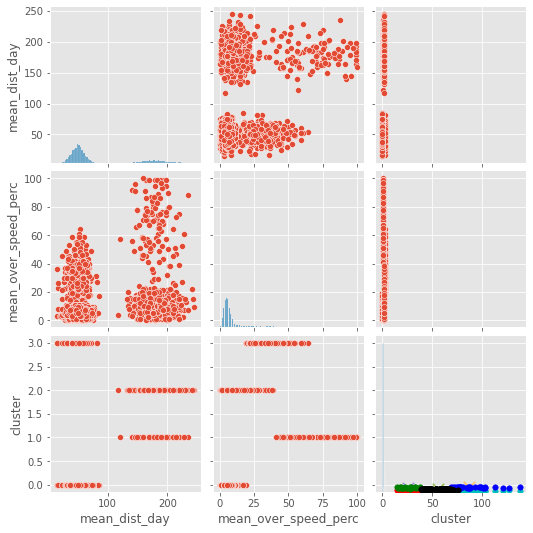

In [33]:
import pandas as pd

data = pd.read_csv("driver-data.csv", index_col="id")
data.head()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

kmeans.fit(data)

kmeans.cluster_centers_

kmeans.labels_

import numpy as np

unique, counts = np.unique(kmeans.labels_, return_counts=True)

dict_data = dict(zip(unique, counts))
dict_data

import seaborn as sns

data["cluster"] = kmeans.labels_

sns.pairplot(data)

kmeans.inertia_

kmeans.score

data


from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd 

style.use('ggplot')

class K_Means:
	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

	def fit(self, data):

		self.centroids = {}

		#initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
		for i in range(self.k):
			self.centroids[i] = data[i]

		#begin iterations
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOptimal:
				break

	def pred(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification

def main():
	
	df = pd.read_csv("Mall_Customers.csv")
	df = X = df.iloc[:, [3, 4]]
	dataset = df.astype(float).values.tolist()

	X = df.values #returns a numpy array
	
	km = K_Means(5)
	km.fit(X)

	# Plotting starts here
	colors = 10*["r", "g", "c", "b", "k"]

	for centroid in km.centroids:
		plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

	for classification in km.classes:
		color = colors[classification]
		for features in km.classes[classification]:
			plt.scatter(features[0], features[1], color = color,s = 30)
	
	plt.show()


if __name__ == "__main__":
	main()
